# Exercise 7
## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Chapman-Kolmogorov

### 1.

In [2]:
N = 2 * 50 + 1
dt = 1
M = int(1000/dt)

In [3]:
distr_over_time = np.zeros((N, M))
distr_over_time.shape

(101, 1000)

In [4]:
# All in one position in the beginning
distr_over_time[int(N/2)][0] = 1
distr_over_time[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2.

In [5]:
def trans_probability(std_dev, mu, dt, x, x_prime):
    return 1/(np.sqrt(2*np.pi*std_dev**2*dt)) * np.exp(-(x - x_prime - mu *dt)**2/(2*std_dev**2*dt))

In [6]:
transition_prob = np.zeros((N, N))
mu = 0.1
std_dev = 1.0

In [7]:
for new_pos in range(N):
    for old_pos in range(N):
        transition_prob[old_pos][new_pos] = trans_probability(std_dev, mu, dt, new_pos, old_pos)

### 3. 

In [8]:
for i in range(M):
    if i == M -1: # Sorry
        break
    t1 = distr_over_time[:, i] @ transition_prob
    distr_over_time[:, i+1] = t1

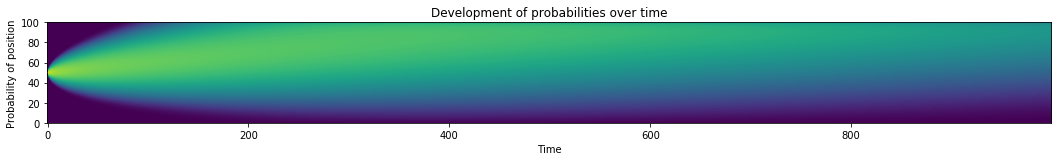

In [9]:
distr_over_time += 0.000001
plt.figure(figsize = (18, 5))
plt.imshow(np.log(distr_over_time[:, :]))
plt.ylim(0, 100)
plt.xlabel("Time")
plt.ylabel("Probability of position")
plt.title('Development of probabilities over time')
plt.show()

In [11]:
repr_times = [0, 10, 50, 200, 500]

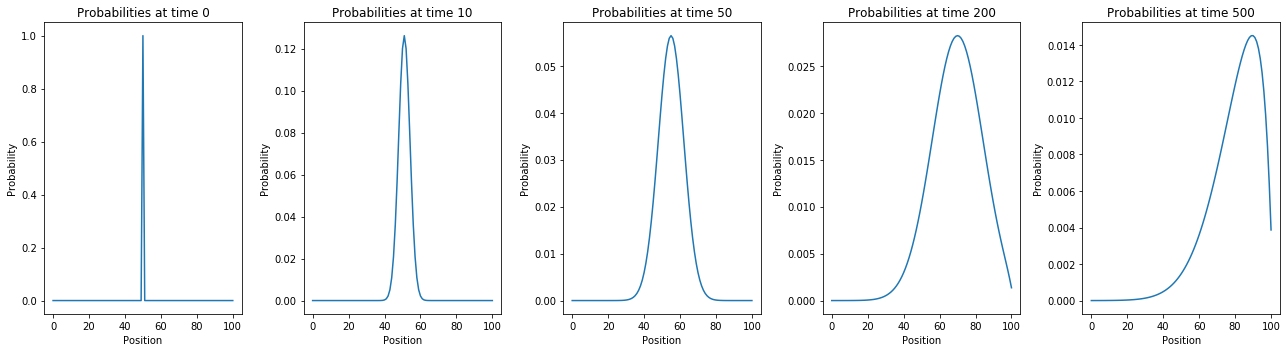

In [12]:
fig, axs = plt.subplots(1, len(repr_times), figsize = (18, 5))

for i, ax in zip(repr_times, axs.ravel()):
    ax.plot(distr_over_time[:, i])
    ax.set_xlabel('Position')
    ax.set_ylabel('Probability')
    ax.set_title('Probabilities at time {}'.format(i))
fig.tight_layout()
plt.show()

### 4.

- Boundary: 

We have implemented a drift-diffusion model with a positive drift value that is subtracted from the old and new positions in the transition matrix. This means that transitions where x' is larger than x are favored, such that the drift is towards higher values. The code responsible for this is the -mu * dt in the calculation of the transition matrix. This is suitable for what we want to simulate because the decision process should also drift towards a positive or negative decision boundary.

### 5.

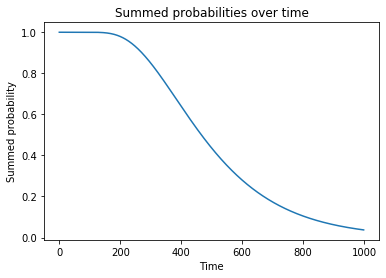

In [13]:
trans = np.sum(distr_over_time, axis = 0)
plt.plot(trans)
plt.xlabel('Time')
plt.ylabel('Summed probability')
plt.title('Summed probabilities over time')
plt.show()

The probabilities are not normalized because the transition probabilities in the transition matrix do not sum up to 1 as we would have expected. 

### 6.

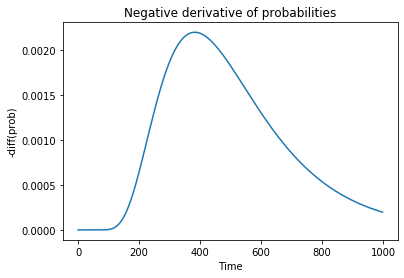

In [14]:
plt.plot(-np.diff(trans))
plt.xlabel('Time')
plt.ylabel('-diff(prob)')
plt.title('Negative derivative of probabilities')
plt.show()

Sadly, we can infer about the relationship very little. However, the curves look similar, this one is shifted a little to the right.

### 7.

- For the plot in 6, we would say that the decision is taken at the maximum of the curve because there is no change anymore.
- We would need the curve for negative decisions as well as this otherwise only tells us about the positive decision.
- We could also relate the mean of the distribution at one point in time to the decision boundary, once it crosses it in either direction, we are likely to get a decision.

## 2. Fokker-Planck

### 1. 

In [15]:
N = 2 * 50 + 1
dt = 1
M = int(1000/dt)
distr_over_time = np.zeros((N, M))

distr_over_time[int(N/2)][0] = 1
distr_over_time[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2.

In [16]:
def fokker_trans(std_dev, mu, old_pos, trans_prob, r=1, dtx = 1):  
    part1 = (1-r*std_dev**2)*trans_prob[old_pos[1]]
#     print('1', part1, trans_prob[old_pos[1]])
    part2 = 1/2*(r/dtx * mu + r * std_dev**2) * trans_prob[old_pos[2]]
#     print('2', part2, trans_prob[old_pos[2]])
    part3 = 1/2 *(-r/dtx * mu + r*std_dev**2) * trans_prob[old_pos[0]]
#     print('3', part3, trans_prob[old_pos[0]])
    return part1 + part2 + part3
#     return (1-r*std_dev**2)*trans_prob[old_pos[1]] + 1/2*(r/dtx * mu + r * std_dev**2) * trans_prob[old_pos[2]] +1/2 *(-r/dtx * mu + r*std_dev**2) * trans_prob[old_pos[0]]

In [17]:
def get_old_pos(new_pos, N):
    # Boundary conditions:
    if new_pos == 0:
        return [0, 0, 1]
    elif new_pos == N:
        return [N-1, N, N]
    else:
        return [new_pos-1, new_pos, new_pos+1]

In [18]:
transition_prob = np.zeros((N, N))
mu = 0.1
std_dev = 1.0

In [19]:
initial_cond = distr_over_time[:, 0]
initial_cond

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# for new_pos in range(N-1):
#     old_pos = get_old_pos(new_pos, N)
#     a = fokker_trans(std_dev, mu, old_pos, transition_prob[new_pos])
#     transition_prob[new_pos][new_pos] = a

In [21]:
for new_pos in range(N-1):
    old_pos = get_old_pos(new_pos, N)
    a = fokker_trans(std_dev, mu, old_pos, initial_cond)
#     else: 
#         a = fokker_trans(std_dev, mu, old_pos, transition_prob[new_pos])
    transition_prob[new_pos][new_pos] = a

In [22]:
transition_prob

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
## TODO: Try 2
### How is the initialization? The initial distribution??

In [24]:
transition_prob = np.eye(N, N)
for new_pos in range(N-1):
    old_pos = get_old_pos(new_pos, N)
    a = fokker_trans(std_dev, mu, old_pos, transition_prob[new_pos])
    transition_prob[new_pos][new_pos] = a

In [25]:
np.diag(transition_prob)

array([0.45, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  ])